Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6360 - loss: 1.2690 - val_accuracy: 0.9069 - val_loss: 0.3449
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9108 - loss: 0.3263 - val_accuracy: 0.9277 - val_loss: 0.2597
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9291 - loss: 0.2575 - val_accuracy: 0.9358 - val_loss: 0.2249
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9393 - loss: 0.2182 - val_accuracy: 0.9452 - val_loss: 0.1952
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9470 - loss: 0.1896 - val_accuracy: 0.9498 - val_loss: 0.1754
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9526 - loss: 0.1680 - val_accuracy: 0.9531 - val_loss: 0.1621
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9579 - loss: 0.1519 - val_accuracy: 0.9579 - val_loss: 0.1471
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9621 - loss: 0.1347 - val_accuracy: 0.9614 - v

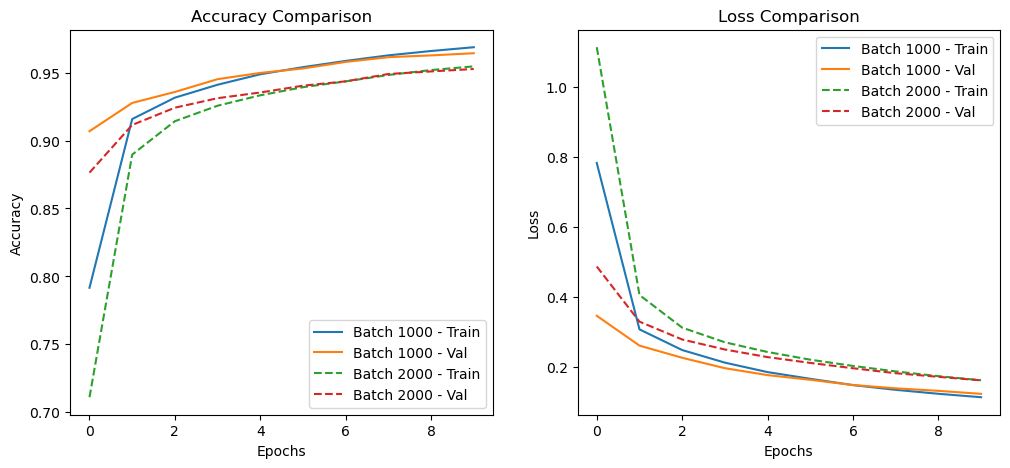

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the same model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Convert 28x28 image to 1D (784 inputs)
        Dense(128, activation='relu'),  # Hidden layer with 128 neurons
        Dense(10, activation='softmax') # Output layer with 10 neurons (digits 0-9)
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train model with different batch sizes
def train_with_batch_size(batch_size):
    model = create_model()
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=batch_size)
    return history

# Train with batch sizes of 1000 and 2000
history_1000 = train_with_batch_size(1000)
history_2000 = train_with_batch_size(2000)

# Function to plot accuracy and loss curves
def plot_comparison(history_1000, history_2000):
    plt.figure(figsize=(12, 5))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    plt.plot(history_1000.history['accuracy'], label='Batch 1000 - Train')
    plt.plot(history_1000.history['val_accuracy'], label='Batch 1000 - Val')
    plt.plot(history_2000.history['accuracy'], label='Batch 2000 - Train', linestyle='dashed')
    plt.plot(history_2000.history['val_accuracy'], label='Batch 2000 - Val', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Comparison')

    # Loss comparison
    plt.subplot(1, 2, 2)
    plt.plot(history_1000.history['loss'], label='Batch 1000 - Train')
    plt.plot(history_1000.history['val_loss'], label='Batch 1000 - Val')
    plt.plot(history_2000.history['loss'], label='Batch 2000 - Train', linestyle='dashed')
    plt.plot(history_2000.history['val_loss'], label='Batch 2000 - Val', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Comparison')

    plt.show()

# Plot results
plot_comparison(history_1000, history_2000)